### 목표 : 많은 특성의 데이터셋에서 과대적합 해결
- 데이터 : perch3.csv
- 피처 : 'Length', 'Height', 'Width'
- 타겟 : 'Weight
- [조건]
    * 특성 추가 => degree = 5로 설정
    * 특성을 기반으로 무게 예측 => 지도학습 + 회귀

In [328]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [329]:
file = '../data/perch3.csv'
data = pd.read_csv(file)
data

,Weight,Length,Height,Width
0,5.9,8.4,2.1120,1.4080
1,32.0,13.7,3.5280,1.9992
2,40.0,15.0,3.8240,2.4320
3,51.5,16.2,4.5924,2.6316
4,70.0,17.4,4.5880,2.9415
5,100.0,18.0,5.2224,3.3216
6,78.0,18.7,5.1992,3.1234
7,80.0,19.0,5.6358,3.0502
8,85.0,19.6,5.1376,3.0368
9,85.0,20.0,5.0820,2.7720


In [330]:
featureDF = data[['Length', 'Height', 'Width']]
targetDF = data['Weight']

print(f"featureDF => {featureDF.shape}       targetDF => {targetDF.shape}")

featureDF => (56, 3)       targetDF => (56,)


[2-2] 데이터 분포 확인

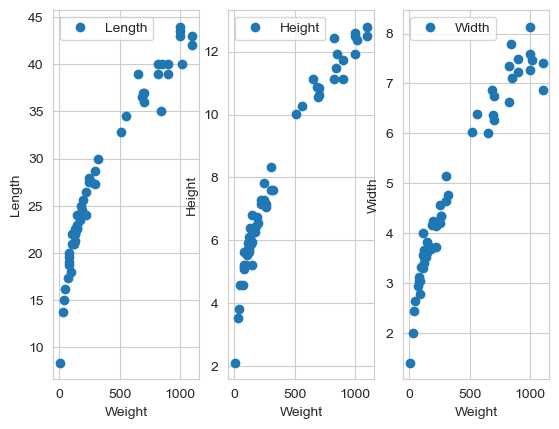

In [331]:
for nIdx in range(1,4):
    
    plt.subplot(1,3,nIdx)
    plt.plot(targetDF, featureDF[featureDF.columns[nIdx - 1]], 'o', label = featureDF.columns[nIdx - 1])
    plt.xlabel('Weight')
    plt.ylabel(featureDF.columns[nIdx - 1])
    plt.legend()
plt.show()

# 직선의 형태는 아니지만 곡선의 양의 방향/비례하는 분포 확인 (선형의 관계)

[3] 데이터 가공 <hr>
- 특성 추가
- 특성 스케일링

[3-1] 특성 추가

In [332]:
from sklearn.preprocessing import PolynomialFeatures

scaler = PolynomialFeatures(degree = 5, include_bias = False)

In [333]:
poly_featureDF = scaler.fit_transform(featureDF)

In [334]:
#poly_featureDF = pd.DataFrame(poly_featureDF, columns = scaler.get_feature_names_out())
#poly_featureDF

In [335]:
poly_featureDF.shape

(56, 55)

[3-2] 피처 스케일링

- 훈련용 & 테스트용 분리

In [336]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(poly_featureDF, targetDF, random_state = 5)

# 얘는 분류가 아니라서 stratify 파라미터는 설정할 필요 없다.

In [337]:
print(f"TRAIN => {X_train.shape}, {y_train.shape}      TEST => {X_test.shape}, {y_test.shape}")

TRAIN => (42, 55), (42,)      TEST => (14, 55), (14,)


- 스케일링 진행

In [338]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(X_train)

StandardScaler()

In [339]:
scaled_X_train = std_scaler.transform(X_train)
scaled_X_test = std_scaler.transform(X_test)

[4] 학습 진행 => 회귀

In [340]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(scaled_X_train, y_train)

LinearRegression()

In [341]:
train_score = lr_model.score(scaled_X_train, y_train)
test_score = lr_model.score(scaled_X_test, y_test)

print(f"Train Score => {train_score}             Test Score => {test_score}")

# 엄청난 과대 적합이 나타났다!

Train Score => 1.0             Test Score => -38.767868061603046


### 규제 : 가중치 값을 조절해서 과대적합 문제 해결 <hr>
- Ridge : 모든 피처에 가중치를 0에 가깝게 조절
- Lasso : 특정 피처에 가중치를 0으로 해서 차원 축소 부여

- [규제1] Ridge 

In [342]:
from sklearn.linear_model import Ridge

In [343]:
ridge_model = Ridge(max_iter=100)
ridge_model.fit(scaled_X_train, y_train)

Ridge(max_iter=100)

In [344]:
train_score = ridge_model.score(scaled_X_train, y_train)
test_score = ridge_model.score(scaled_X_test, y_test)

print(f"Train Score => {train_score}             Test Score => {test_score}")

# 적정적합으로 수정되었다!!!!

Train Score => 0.9874355208005008             Test Score => 0.9914491207423642


In [345]:
# 모델 파리미터
print(ridge_model.n_iter_, ridge_model.coef_, ridge_model.intercept_, sep='\n\n')

#coef는 피처 개수 만큼 생성된다

None

[ 1.83176874e+00 -7.23677789e+00  1.03067055e+01  1.57775249e+01
  1.18446480e+01  1.67466597e+01  9.57952490e+00  1.47797173e+01
  2.48615142e+01  1.85163425e+01  1.67577526e+01  1.46142404e+01
  1.58382863e+01  1.38108100e+01  1.64490445e+01  1.56379186e+01
  1.39352928e+01  1.71480760e+01  2.50779150e+01  1.42694832e+01
  1.39921892e+01  6.23690826e+00  1.41806030e+01  6.32646330e+00
  2.93976268e+00  1.47629117e+01  7.00986521e+00  3.97399179e+00
  5.70584401e+00  1.56796396e+01  8.23737024e+00  5.75159002e+00
  8.24469917e+00  1.54675618e+01  5.86439125e+00  6.81074624e+00
 -5.88111799e+00  8.02129126e+00 -4.97701429e+00 -1.36851639e+01
  9.44134707e+00 -3.67900627e+00 -1.22792895e+01 -1.61590708e+01
  1.10232306e+01 -2.01766706e+00 -1.03096090e+01 -1.36546600e+01
 -1.21067571e+01  1.27255386e+01 -1.99919223e-02 -7.79070771e+00
 -1.04001988e+01 -7.93557014e+00 -7.20881695e-01]

365.6404761904762


In [346]:
# ===> 최적의 규제 강도 설정 값 찾기
alphas = [0.1, 1.0, 10, 20, 30]
ridge_score = [[], []]

for a in alphas:
    ridge_model = Ridge(alpha=a)
    ridge_model.fit(scaled_X_train, y_train)
    train_score = ridge_model.score(scaled_X_train, y_train)
    test_score = ridge_model.score(scaled_X_test, y_test)
    
    ridge_score[0].append(train_score)
    ridge_score[1].append(test_score)

In [347]:
# 테스트 점수가 가장 높은 알파
best_alpha_IDX = ridge_score[1].index(max(ridge_score[1]))
best_alpha = alphas[best_alpha_IDX]
best_alpha

1.0

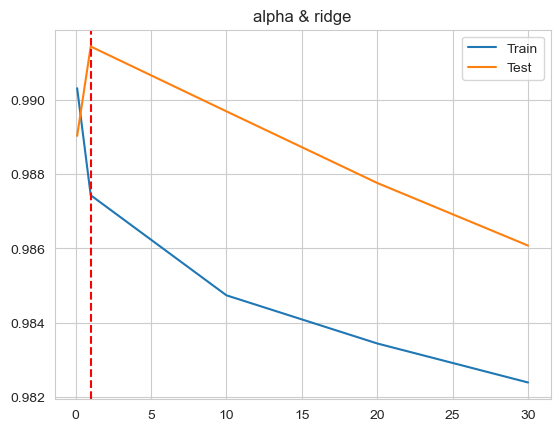

In [348]:
# 학습 및 테스트 점수 기반 시각화
import matplotlib.pyplot as plt

plt.plot(alphas, ridge_score[0], label='Train')
plt.plot(alphas, ridge_score[1], label='Test')
plt.axvline(best_alpha, linestyle = '--', color = 'red')
plt.legend()
plt.title('alpha & ridge')
plt.show()

In [349]:
from sklearn.linear_model import Lasso

In [350]:
lasso_model = Lasso()
lasso_model.fit(scaled_X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.117e+03, tolerance: 4.884e+02
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [351]:
train_score = ridge_model.score(scaled_X_train, y_train)
test_score = ridge_model.score(scaled_X_test, y_test)

print(f"Train Score => {train_score}             Test Score => {test_score}")

Train Score => 0.982383820995442             Test Score => 0.9860777054753922


In [352]:
# 모델 파라미터
print( lasso_model.n_iter_, lasso_model.coef_, lasso_model.intercept_)

# 릿지와의 차이점을 보자. 여기는 0이 되는 값들이 많다. 즉 영향을 1도 안미치는 피쳐들로 규제가 되거당

1000 [ 0.          0.          0.          8.39678696  0.          0.
 13.70952971  0.         87.23199451 91.06954235 16.61716411  0.
 35.69479723  0.          0.         46.93195311  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         41.8984421
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.          0.          0.
 -0.         -0.          0.          0.         -0.         -0.
 -0.          0.          0.          0.         -0.         -0.
 -0.        ] 365.6404761904762


In [353]:
# ====> 최적의 규제 강도 설정 값 찾기
alphas = [0.1, 1.0, 10., 20., 30.]
lasso_score = [[], []]

for a in alphas:
    lasso_model = Lasso(alpha=a, max_iter=100000)
    lasso_model.fit(scaled_X_train, y_train)
    train_score = lasso_model.score(scaled_X_train, y_train)
    test_score = lasso_model.score(scaled_X_test, y_test)
    lasso_score[0].append(train_score)
    lasso_score[1].append(test_score)

In [354]:
# 테스트 점수가 가장 높은 알파
best_alpha = alphas[lasso_score[1].index(max(lasso_score[1]))]
best_alpha

1.0

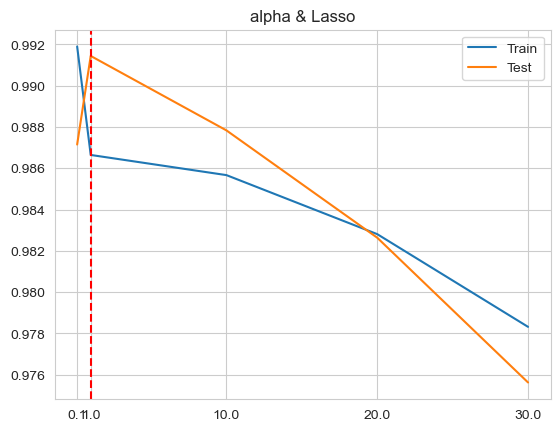

In [355]:
# 학습 및 테스트 점수 기반 시각화
import matplotlib.pyplot as plt
plt.plot(alphas, lasso_score[0], label='Train')
plt.plot(alphas, lasso_score[1], label='Test')
plt.title('alpha & Lasso')
plt.axvline(best_alpha, linestyle='--', color='red')
plt.xticks(alphas)
plt.legend()
plt.show()